In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
plt.rcParams["font.family"] = "Arial"

In [3]:
__path__ = os.getcwd()

In [4]:
# Only getting M+0 - M+4, the isotopologues that were consistently quantified
data = pd.read_csv(
    os.path.join(__path__, "..", "data", "mct1_tracing_data", "citrate-tracing.txt"),
    sep="\t")

In [5]:
data.loc[data["Condition"] == "WT + EV", "Condition"] = "WT"
data.loc[data["Condition"] == "mct1-del + EV", "Condition"] = "$\it{mct1}\Delta$"

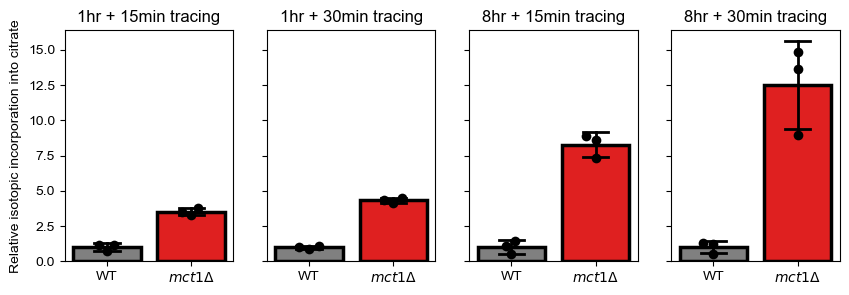

In [12]:
plt.rcParams["patch.force_edgecolor"] = True
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(10,3))
counter = 0
for x in data["Timepoint"].unique():
    d = data.loc[data["Timepoint"] == x][["Condition", "M+2"]]
    d.index = d["Condition"]
    d = d.drop("Condition", axis=1)
    d.index.name = None
    d["M+2"] = (d["M+2"] / d.loc[d.index == "WT"]["M+2"].mean())
    sns.barplot(
        x=d.index, 
        y=d["M+2"], 
        ax=axes[counter], 
        palette=['gray','red'],
        linewidth=2.5, 
        errcolor="k", 
        errwidth=2,
        edgecolor="k",
        capsize=.3,
        errorbar="sd"
    )
    sns.swarmplot(
        x=d.index, 
        y=d["M+2"], 
        ax=axes[counter], 
        color="black",
        size=7)
    axes[counter].set_title("{0} + {1} tracing".format(x.split(" ")[0], x.split(" ")[1]))
    if counter == 0:
        axes[counter].set_ylabel("Relative isotopic incorporation into citrate")
    else:
        axes[counter].set_ylabel("")
    counter += 1
plt.savefig("citrate.png", dpi=1200, bbox_inches = 'tight')

In [8]:
!conda list

# packages in environment at C:\Users\jorda\miniconda3:
#
# Name                    Version                   Build  Channel
_r-mutex                  1.0.0               anacondar_1  
anndata                   0.8.0                    pypi_0    pypi
antimony                  2.13.1                   pypi_0    pypi
appdirs                   1.4.4                    pypi_0    pypi
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py38h2bbff1b_0  
arviz                     0.11.2             pyhd3eb1b0_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
atomicwrites              1.4.0                    pypi_0    pypi
attrs                     21.4.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1           py38haa95532_0  
blas                      1.0                         mkl  
bleach                    4.1.0              pyhd3eb1b0_0  
blosc      